Week 4, Assignment C1:

CAPM and Modern Portfolio Theory in Python

In this notebook, we will study Modern Portfolio Theory in Python.
Please complete the lines bellow where you see "# TODO".

In [48]:
#Objective 1.
#Use this cell to import Numpy (as np) and Pyplot (from Matplotlib as plt) packages.
import numpy as np  
from matplotlib import pyplot as plt


In [49]:
#Objective 2.
#Select a number of asset classes ( > 1 ) and a number of observations ( > 500 ).  Store your chosen values to the
#two new variables "no_of_asset_classes" and "no_of_observations", respectively.
no_of_asset_classes = 5  #Number of stocks 
no_of_observations = 1000

In [118]:
np.random.seed(123)#Sets the Random Number Generator to begin frm a specific position
matrix_of_return_values = np.random.randn(no_of_asset_classes, no_of_observations)
#Objective 3.
#Select a number of test portfolios to generate ( > 1,000 < 20,000).  Store your chosen value to the new variable
#"no_of_portfolios".  

no_of_portfolios = 10000
#print(matrix_of_return_values)
#matrix_of_return_values.shape

In [53]:
#Objective 4.
#Initialize four empty lists called "collection_of_random_asset_weights", "portfolio_means",
#"portfolio_standard_deviations", and "portfolio_sharpe_ratios", respectively.
collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

In [54]:
#Objective 5.
#Write a function called "get_random_asset_weights" that takes as input (Input.I) any number of asset classes
#"no_of_asset_classes" and returns (Output.I) a Numpy vector (matrix) of weights (percentages) of length "no_of_asset_classes"
#whose sum is one (1).

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    #total =random_asset_weights.sum()
    random_asset_weights /= sum(random_asset_weights) # to make the sum of weights = 1
    random_asset_weights = np.asmatrix(random_asset_weights)
    return random_asset_weights
    
asset_weights=get_random_asset_weights(no_of_asset_classes)
print(asset_weights)

[[0.26616189 0.19260816 0.2285151  0.07462904 0.23808582]]


In [112]:
#Objective 6.
#Write a function called "get_portfolio_statistics" that takes as input (Input.I) a Numpy vector (matrix)
#"asset_weights" of weights (percentages) whose sum is one (1) and (Input.II) a Numpy matrix of return values
#"matrix_of_return_values" whose first axis length is the same as the length of the Numpy vector (matrix)
#"asset_weights" and returns (Output.I) the mean "portfolio_mean", (Output.II) the standard deviation
#"portfolio_standard_deviation", and (Output.III) the Sharpe ratio "portfolio_sharpe_ratio" of the portfolio of
#assets with asset weights "asset_weights" and asset return values belonging to "matrix_of_return_values".

def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean = asset_weights * asset_means.T        #asset_means.sum()/no_of_asset_classes
    portfolio_mean = portfolio_mean.item() #to convert its value type from matrix from float 
    portfolio_standard_deviation =np.sqrt(asset_weights * asset_covariances * asset_weights.T)  #abs(sqrt(portfolio_mean-(portfolio_mean**2)))
    portfolio_standard_deviation = portfolio_standard_deviation.item()
    portfolio_sharpe_ratio = portfolio_mean /portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio
get_portfolio_statistics(asset_weights,matrix_of_return_values)   


(0.012639877887669538, 0.4536661525514418, 0.027861628681316013)

In [113]:
#Objective 7.
#Using the functions constructed in Objectives 5 and 6, write a loop that, on each iteration, determines a
#Numpy vector (matrix) of weights (percentages) "random_asset_weights" of length "no_of_asset_classes" whose sum 
#is one (1) and then appends to each of the lists "collection_of_random_asset_weights", "portfolio_means",
#"portfolio_standard_deviations", and "portfolio_sharpe_ratios" the Numpy vector (matrix) of weights (percentages)
#"random_asset_weights"; and the mean "portfolio_mean", the standard deviation "portfolio_standard_deviation", and
#the Sharpe ratio "portfolio_sharpe_ratio" of the portfolio of assets with asset weights "asset_weights" and asset 
#return values belonging to "matrix_of_return_values", respectively.
while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    PM,PSD,PSR=get_portfolio_statistics(random_asset_weights,matrix_of_return_values)
    portfolio_means.append(PM)
    portfolio_standard_deviations.append(PSD)
    portfolio_sharpe_ratios.append(PSR)
#print(portfolio_mean)   

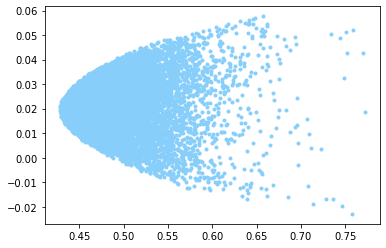

In [59]:
#Objective 8.
#Make a scatterplot of the corresponding values (x,y) = (portfolio_standard_deviation, portfolio_mean) from the
#lists "portfolio_standard_deviations" and "portfolio_means", respectively.

plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue') 
plt.show()

In [60]:
#Objective 9.
#Find the list index of the portfolio of highest Sharpe ratio.

index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))
print(index)


7397


In [124]:
#Objective 10.
#Print the asset weights and Sharpe ratio of the portfolio of highest Sharpe ratio, using index above.

print("The collection of asset weights: \n",collection_of_random_asset_weights[index])
print("\nAsset weights' Index:\n",index)

The collection of asset weights: 
 [[0.01491691 0.11662    0.01634701 0.45335809 0.39875799]]

Asset weights' Index:
 7397


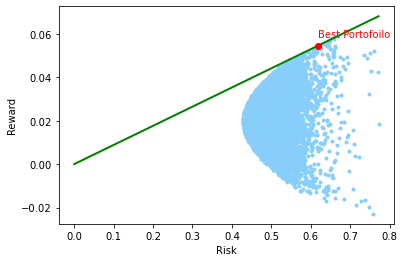

In [117]:
#Objective 11.
#Add the Capital Market Line to your scatterplot from Objective 8.

x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.xlabel("Risk")
plt.ylabel("Reward")
plt.plot(portfolio_standard_deviations,portfolio_means , 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.annotate("Best Portofoilo", (portfolio_standard_deviations[index],portfolio_means[index]), textcoords="offset points",xytext=(0,9), c="r")
plt.plot(portfolio_standard_deviations[index],portfolio_means[index],color='r', marker='o' )

plt.show() #CML


#Objective 12.
#All of the work in this notebook assumes a risk-free rate of zero (0.00).  How could this work be modified to
#accommodate a nonzero risk-free rate?  Explain.

for the risk-free rate of zero, 
the Sharpe ratio formula = (measure of reward - riskfree rate) /measure of risk. since the value of riskfree rate is 0, we can remove the riskfree rate from the numerator and reshape the formula to be like this:
Sharpe ratio formula= measure of reward /measure of risk
but if the value of the risk-free rate is more than zero, we need to subtract its value from the measure of reward.
This will reduce the value of the numerator which leads to reducing the amount of reward for each unit of risk.
as a result, it's better to have a risk-free rate =0 to get the best possible reward with the least possible risk


--  --